<a href="https://colab.research.google.com/github/MusaibSyd/Machine-learning/blob/main/SVM_Viral_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('mouse_viral_study.csv')

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.shape

(400, 3)

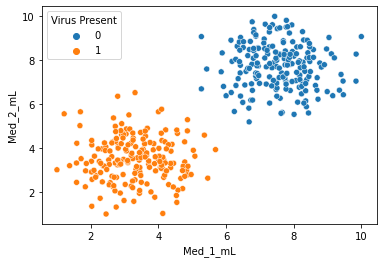

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

In [9]:
from sklearn.svm import SVC

In [10]:
X = df.drop('Virus Present', axis=1)

In [11]:
y = df['Virus Present']

In [14]:
model = SVC(kernel='linear',C=1000)

In [15]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [18]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


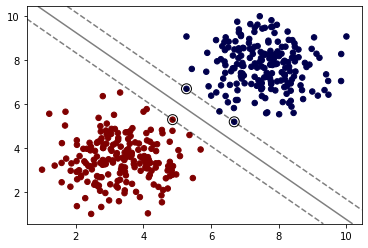

In [17]:
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


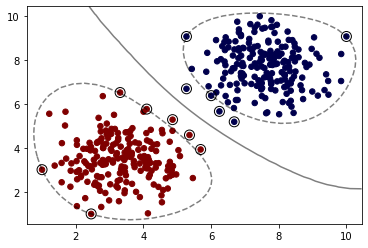

In [19]:
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

In [23]:
grid = GridSearchCV(svm,param_grid)

In [24]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [25]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}